## Sentiment Analysis Project 
We are going to use a Naive Bayes Classifer, because efficient and fast. If time, we will compare it with other methods, especially lexicon & rule-based methods.
The first step of the project is to quickly analyze our data. 

### 1. Exploring the dataset
In this section we will quickly explore the dataset. Namely, we will compute : 
- Ratings and length distributions : 
    - distributon of ratings 
    - distributions of review length in characters and word counts
    - distributions of helpfullness per ratings 
- Wordclouds per ratings (most common words per ratings)

In [151]:
## Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
file = pd.read_csv('./data/reviews.csv')

In [4]:
for col in file.columns:
    print(col)

Id
ProductId
UserId
ProfileName
HelpfulnessNumerator
HelpfulnessDenominator
Score
Time
Summary
Text


###### Dataframe feature description (as they appear in the df) : 
- Id : row ID (primary key)
- ProductId : Unique identifier for the product
- UserId : Unqiue identifier for the user
- ProfileName : Profile name of the user
- HelpfulnessNumerator : Number of users who found the review helpful
- HelpfulnessDenominator : Number of users who indicated whether they found the review helpful or not
- Score : Rating between 1 and 5
- Time : Timestamp for the review
- Summary : Brief summary of the review
- Text : Text of the review

### Ratings and length distributions

In [56]:
# plot the distribution of ratings 
def ratings_distrib(data) :
    array = data['Score'].values
    bins = np.arange(1, array.max() + 1.5) - 0.5
    fig, ax = plt.subplots()
    _ = ax.hist(array, bins, rwidth=0.5, density=True)
    ax.set_xticks([1, 2, 3, 4, 5])
    _=plt.xlabel('Rating')
    _=plt.ylabel('Distribution')
    return plt.show()

# plot the distribution of review length
def len_distrib(data):
    len_str = [len(x) for x in data['Text']]
    _=plt.hist(len_str, density=False, bins = range(0, 4000))
    _=plt.xlabel('Text length in chars')
    _=plt.ylabel('Count')
    return plt.show()

# plot the distribution of word counts, using the nltk RegexpTokenizer
def word_distrib(data):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counts = [len(tokenizer.tokenize(x)) for x in data['Text']]
    _=plt.hist(word_counts, density=False, bins = range(0, 600))
    _=plt.xlabel('Word Counts')
    _=plt.ylabel('Count')
    return plt.show()


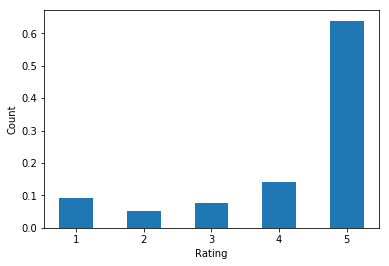

In [53]:
ratings_distrib(file)

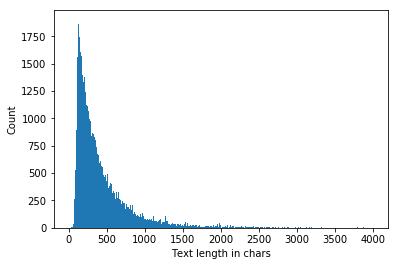

In [54]:
len_distrib(file)

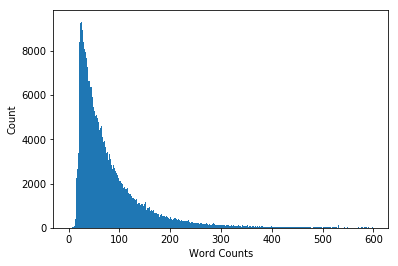

In [55]:
word_distrib(file)

In [88]:
# len distribution per rating 
def len_rating(file) : 
    df = pd.DataFrame(file['Text'], file['Score'])
    df['len'] = [len(x) for x in file['Text']]
    fig, ax = plt.subplots(figsize = (25,9))
    df.boxplot(column = ['len'], by = 'Score', ax=ax, showfliers=False) #outliers removed for clarity
    return plt.show()

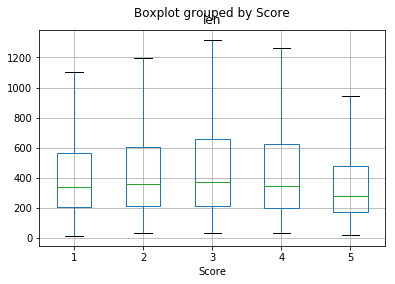

In [89]:
len_rating(file)

In [6]:
# wordcount per rating
def wordcount_rating(file) : 
    df = pd.DataFrame(file['Text'], file['Score'])
    tokenizer = RegexpTokenizer(r'\w+')
    df['word_counts'] = [len(tokenizer.tokenize(x)) for x in file['Text']]    
    fig, ax = plt.subplots(figsize = (25, 9))
    df.boxplot(column = ['word_counts'], by = 'Score', ax=ax, showfliers=False) #outliers removed for clarity
    return plt.show()

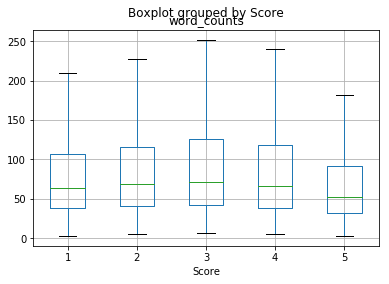

In [7]:
wordcount_rating(file)

/Users/patriciaroze/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


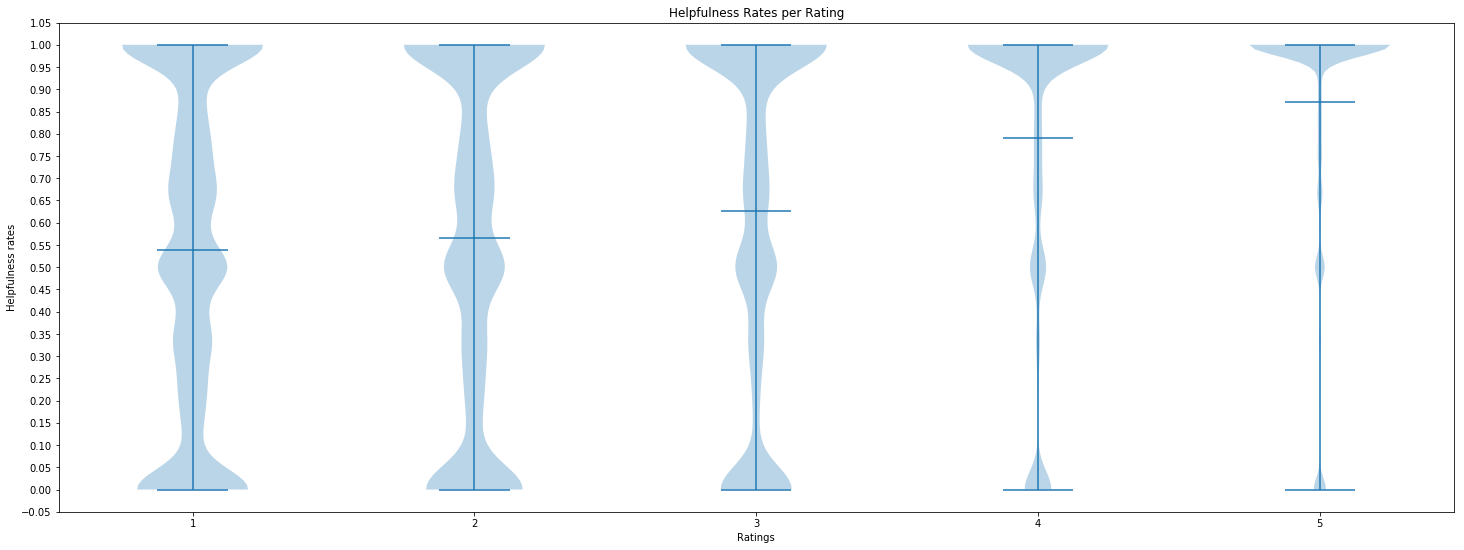

In [150]:
def helpfulness_rating_violin(file):
    df = file[file['HelpfulnessDenominator']>0]
    df['help_coeff'] = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']
    df = df.drop(df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']].index)
    fig, axes = plt.subplots(figsize=(25,9))
    axes.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.05))
    axes.violinplot(dataset = [df[df.Score == 1]["help_coeff"].values,
                           df[df.Score == 2]["help_coeff"].values,
                           df[df.Score == 3]["help_coeff"].values,
                           df[df.Score == 4]["help_coeff"].values,
                           df[df.Score == 5]["help_coeff"].values], showmeans = True)
    axes.set_title('Helpfulness Rates per Rating')
    axes.set_xlabel('Ratings')
    axes.set_ylabel('Helpfulness rates')
    return plt.show()
helpfulness_rating_violin(file)

### WordClouds per Rating 

In this section, we round up our exploration of the dataset by creating wordclouds from the reviews. We will separate the good and bad reviews. In this first step, we will consider bad reviews as the ones rated from 1 to 2 and the good reviews as the ones rated from 4 to 5. 

In [152]:
# A first test on the first review
text = file.Text[0]
text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [164]:
def wordcloud(file, score_min = 1, score_max = 5) : 
    text = " ".join(review for review in file[(file.Score<=score_max) & (file.Score>=score_min)].Text)
    stopwords = set(STOPWORDS)
    stopwords.update(["br", "gp", 'href'])
    wordcloud = WordCloud(stopwords=stopwords, max_words=500, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()
wordcloud(file, score_min = 4)

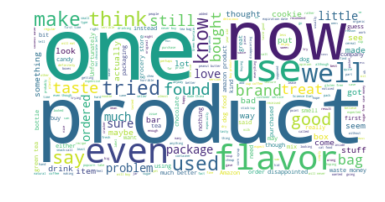

In [165]:
wordcloud(file, score_max = 2)